# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">
     August 31, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">
     2023-8-31
    </a>
   </td>
   <td>
    <span class="w">
     <span class="


Finding row length.

In [7]:
tbody = table.find('tbody')
tr = tbody.find_all('tr')
row_length = len(tr)

In [8]:
row_length

132

Do the scrapping process here (please change this markdown with your explanation)

In [20]:
temp = [] #init

for i in range(row_length):

    #scrapping process
    period = tr[i].find_all('td')
    if len(period) >= 2:
        td1 = period[0]
        td2 = period[1]
        text_td1 = td1.find_all('a')[1].text
        text_td2 = td2.find_all('span')[0].text
        print(text_td1)
        print(text_td2)

        temp.append((text_td1, text_td2))
    
temp 

2023-8-31
$1 = Rp15,225
2023-8-30
$1 = Rp15,223
2023-8-29
$1 = Rp15,202
2023-8-28
$1 = Rp15,248
2023-8-25
$1 = Rp15,298
2023-8-24
$1 = Rp15,246
2023-8-23
$1 = Rp15,301
2023-8-22
$1 = Rp15,324
2023-8-21
$1 = Rp15,325
2023-8-18
$1 = Rp15,321
2023-8-17
$1 = Rp15,343
2023-8-16
$1 = Rp15,369
2023-8-15
$1 = Rp15,318
2023-8-14
$1 = Rp15,330
2023-8-11
$1 = Rp15,324
2023-8-10
$1 = Rp15,263
2023-8-9
$1 = Rp15,214
2023-8-8
$1 = Rp15,212
2023-8-7
$1 = Rp15,225
2023-8-4
$1 = Rp15,153
2023-8-3
$1 = Rp15,148
2023-8-2
$1 = Rp15,227
2023-8-1
$1 = Rp15,121
2023-7-31
$1 = Rp15,099
2023-7-28
$1 = Rp15,107
2023-7-27
$1 = Rp15,102
2023-7-26
$1 = Rp15,009
2023-7-25
$1 = Rp15,027
2023-7-24
$1 = Rp15,022
2023-7-21
$1 = Rp15,043
2023-7-20
$1 = Rp15,056
2023-7-19
$1 = Rp15,009
2023-7-18
$1 = Rp14,989
2023-7-17
$1 = Rp14,972
2023-7-14
$1 = Rp15,003
2023-7-13
$1 = Rp14,954
2023-7-12
$1 = Rp14,935
2023-7-11
$1 = Rp15,140
2023-7-10
$1 = Rp15,187
2023-7-7
$1 = Rp15,162
2023-7-6
$1 = Rp15,178
2023-7-5
$1 = Rp15,078
20

[('2023-8-31', '$1 = Rp15,225'),
 ('2023-8-30', '$1 = Rp15,223'),
 ('2023-8-29', '$1 = Rp15,202'),
 ('2023-8-28', '$1 = Rp15,248'),
 ('2023-8-25', '$1 = Rp15,298'),
 ('2023-8-24', '$1 = Rp15,246'),
 ('2023-8-23', '$1 = Rp15,301'),
 ('2023-8-22', '$1 = Rp15,324'),
 ('2023-8-21', '$1 = Rp15,325'),
 ('2023-8-18', '$1 = Rp15,321'),
 ('2023-8-17', '$1 = Rp15,343'),
 ('2023-8-16', '$1 = Rp15,369'),
 ('2023-8-15', '$1 = Rp15,318'),
 ('2023-8-14', '$1 = Rp15,330'),
 ('2023-8-11', '$1 = Rp15,324'),
 ('2023-8-10', '$1 = Rp15,263'),
 ('2023-8-9', '$1 = Rp15,214'),
 ('2023-8-8', '$1 = Rp15,212'),
 ('2023-8-7', '$1 = Rp15,225'),
 ('2023-8-4', '$1 = Rp15,153'),
 ('2023-8-3', '$1 = Rp15,148'),
 ('2023-8-2', '$1 = Rp15,227'),
 ('2023-8-1', '$1 = Rp15,121'),
 ('2023-7-31', '$1 = Rp15,099'),
 ('2023-7-28', '$1 = Rp15,107'),
 ('2023-7-27', '$1 = Rp15,102'),
 ('2023-7-26', '$1 = Rp15,009'),
 ('2023-7-25', '$1 = Rp15,027'),
 ('2023-7-24', '$1 = Rp15,022'),
 ('2023-7-21', '$1 = Rp15,043'),
 ('2023-7-20', '$

[]

In [21]:
temp = temp[::-1]
temp


[('2023-3-6', '$1 = Rp15,354'),
 ('2023-3-7', '$1 = Rp15,429'),
 ('2023-3-8', '$1 = Rp15,449'),
 ('2023-3-9', '$1 = Rp15,495'),
 ('2023-3-10', '$1 = Rp15,503'),
 ('2023-3-13', '$1 = Rp15,416'),
 ('2023-3-14', '$1 = Rp15,380'),
 ('2023-3-15', '$1 = Rp15,459'),
 ('2023-3-16', '$1 = Rp15,429'),
 ('2023-3-17', '$1 = Rp15,375'),
 ('2023-3-20', '$1 = Rp15,343'),
 ('2023-3-21', '$1 = Rp15,301'),
 ('2023-3-22', '$1 = Rp15,253'),
 ('2023-3-23', '$1 = Rp15,085'),
 ('2023-3-24', '$1 = Rp15,165'),
 ('2023-3-27', '$1 = Rp15,107'),
 ('2023-3-28', '$1 = Rp15,060'),
 ('2023-3-29', '$1 = Rp15,034'),
 ('2023-3-30', '$1 = Rp15,024'),
 ('2023-3-31', '$1 = Rp14,969'),
 ('2023-4-3', '$1 = Rp14,922'),
 ('2023-4-4', '$1 = Rp14,957'),
 ('2023-4-5', '$1 = Rp14,960'),
 ('2023-4-6', '$1 = Rp14,931'),
 ('2023-4-7', '$1 = Rp14,941'),
 ('2023-4-10', '$1 = Rp14,950'),
 ('2023-4-11', '$1 = Rp14,915'),
 ('2023-4-12', '$1 = Rp14,835'),
 ('2023-4-13', '$1 = Rp14,722'),
 ('2023-4-14', '$1 = Rp14,782'),
 ('2023-4-17', '$1 

## Creating data frame & Data wrangling

Put the array into dataframe

In [25]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date', 'currency'))
df.head()

,date,currency
0,2023-3-6,"$1 = Rp15,354"
1,2023-3-7,"$1 = Rp15,429"
2,2023-3-8,"$1 = Rp15,449"
3,2023-3-9,"$1 = Rp15,495"
4,2023-3-10,"$1 = Rp15,503"


In [26]:
df.dtypes

date        object
currency    object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [30]:
df = pd.DataFrame(temp, columns = ('date', 'currency'))
df.head()

,date,currency
0,2023-3-6,"$1 = Rp15,354"
1,2023-3-7,"$1 = Rp15,429"
2,2023-3-8,"$1 = Rp15,449"
3,2023-3-9,"$1 = Rp15,495"
4,2023-3-10,"$1 = Rp15,503"


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [32]:
df['currency'] = df['currency'].str.replace("$1 = Rp","", regex=False)
df['currency'] = df['currency'].str.replace(",","")
df['currency'] = df['currency'].astype("float64")

df.dtypes

date         object
currency    float64
dtype: object

In [34]:
df = df.set_index('date')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: xlabel='date'>

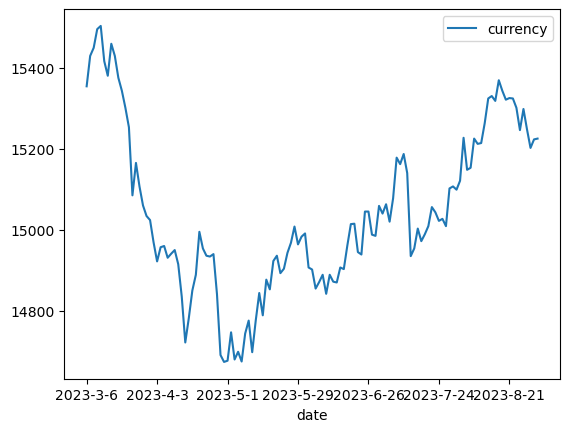

In [35]:
df.plot()


(Put your analysis and conclusion here.)

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.